In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({'exp':[1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4],
                 'salary':[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]})
df.head()

,exp,salary
0,1.2,1.7
1,1.5,2.4
2,1.9,2.3
3,2.2,3.1
4,2.4,3.7


In [3]:
b0=0
b1=0
lr=0.01
n=len(df)
epochs=5
errors=[]
for i in range(epochs):
    for j in range(n):

        y_pred=b0+(b1*df['exp'][j])

        error=y_pred-df['salary'][j]

        b0=b0-(lr*error)
        b1=b1-(lr*error*df['exp'][j])

        errors.append(error)

print(b0)
print(b1)





0.4749574932319782
1.3938275172502381


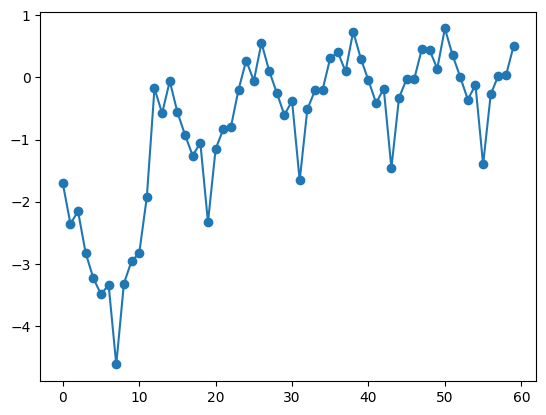

In [6]:
plt.plot(range(60),errors,marker='o')

In [7]:
df=pd.DataFrame({'x':[1, 2, 3, 4, 5],
                 'y':[0, 0, 1, 1, 1]})

df.head()

,x,y
0,1,0
1,2,0
2,3,1
3,4,1
4,5,1


In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
b0=0
b1=0
log_losses=[]
lr=0.01
epochs=5
n=len(df)

for i in range(epochs):
    b0_sum=0
    b1_sum=0
    log_loss_sum=0

    for j in range(n):

        z=b0 + (b1*df['x'][j])
        y_pred=sigmoid(z)
        error=y_pred-df['y'][j]

        b0_sum+=error
        b1_sum+=(error*df['x'][j])

        log_loss_sum+=(y_pred*np.log(y_pred))+((1-y_pred)*np.log(1-y_pred))

    b0=b0-((lr*b0_sum)/n)
    b1=b1-((lr*b1_sum)/n)

    log_loss=log_loss_sum/n

    log_losses.append(log_loss)

print(b0)
print(b1)

0.004321218074742536
0.042527089594912304


In [15]:
df['pred_probs']=sigmoid(b0+(b1*df['x']))
labels=[]

for i in df['pred_probs']:
    if i>=0.5:
        labels.append(1)
    else:
        labels.append(0)

df['pred_classes']=labels

df[['pred_probs','pred_classes','y']]

,pred_probs,pred_classes,y
0,0.511710,1,0
1,0.522329,1,0
2,0.532928,1,1
3,0.543497,1,1
4,0.554027,1,1


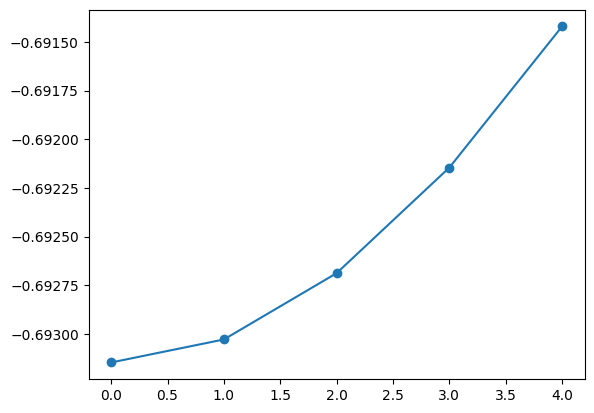

In [16]:
plt.plot([0,1,2,3,4],log_losses,marker='o')